En este notebook se va a implementar el algoritmo de clustering aglomerativo con centroid-linkage. En la primera parte se explica la implementación manual del algoritmo y luego se muestra como realizar los cálculos de forma sencilla con la librería scipy.cluster.

In [1]:
import numpy as np
import tensorflow as tf # Solamente lo utilizamos para descargar los datos
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Primero generamos los puntos aleatorios según tres distribuciones normales.

In [2]:
d1 = np.random.randn(20, 2) + 2
d2 = np.random.randn(20, 2) - 3
d3 = np.random.randn(20, 2)
d3[:, 0] = d3[:, 0] + 4
d3[:, 1] = d3[:, 1] - 4

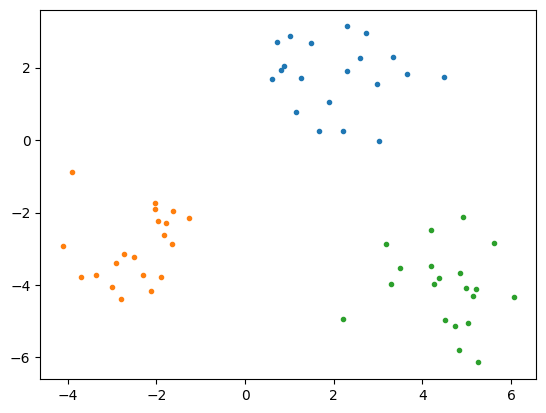

In [3]:
plt.plot(d1[:, 0], d1[:, 1], '.')
plt.plot(d2[:, 0], d2[:, 1], '.')
plt.plot(d3[:, 0], d3[:, 1], '.')
plt.show()

Nuestro conjunto de datos va a ser la concatenación de las tres distribuciones.

In [4]:
datos = np.concatenate((d1, d2, d3), axis=0)
datos = datos[np.random.permutation(len(datos))]

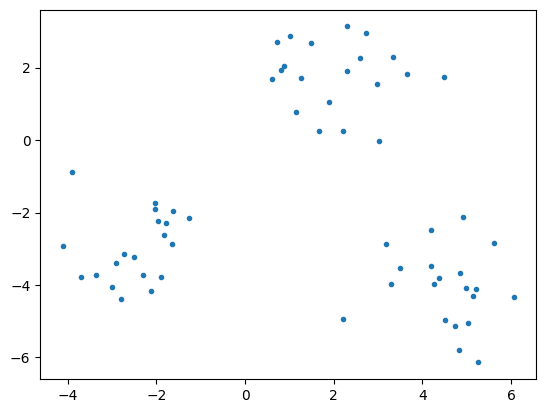

In [5]:
plt.plot(datos[:, 0], datos[:, 1], '.')
plt.show()

Se muestra la matriz de distancias para comprobar que los datos se han mezclado correctamente.

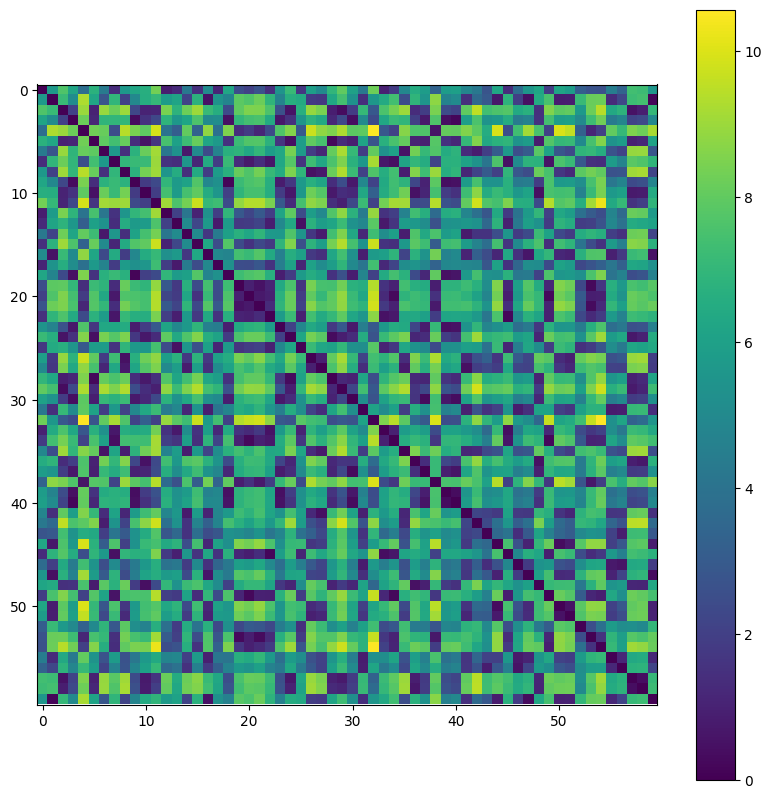

In [6]:
matriz_distancias = euclidean_distances(datos)
plt.figure(figsize=(10, 10))
plt.imshow(matriz_distancias)
plt.colorbar()
plt.show()

## Implementación manual del algoritmo

Vamos a implementar el Centroid-Linkage a mano:

In [7]:
K = 3

In [8]:
# En cada ejecución de esta celda los datos se vuelven a concatenar de forma aleatoria
datos = np.concatenate((d1, d2, d3), axis=0)
datos = datos[np.random.permutation(len(datos))]
# Se guarda una copia de los datos originales para calcular los centroides
datos_original = np.copy(datos)

# A partir de aquí comienza el algoritmo
# Se guardan los singleton clusters para calcular los centroides
set_lists = [[i] for i in range(len(datos))]

while len(datos) > K:
  # Se calcula la matriz de distancias
  matriz_distancias = euclidean_distances(datos)
  # OJO: Importante "distorsionar" la diagonal para no considerar las distancias 0s con el mínimo
  matriz_distancias = matriz_distancias + np.eye(len(datos)) * (matriz_distancias.max() + 1)
  # Obtenemos el índice del argmin
  ind = np.unravel_index(np.argmin(matriz_distancias), matriz_distancias.shape)

  # Actualización de la lista de clusters.
  set1, set2 = set_lists[ind[0]], set_lists[ind[1]]
  nuevo_set = set1 + set2
  set_lists.remove(set1)
  set_lists.remove(set2)
  set_lists.append(nuevo_set)

  # Actualización de la lista de centroides con el nuevo centroide
  nuevo = datos_original[nuevo_set].mean(axis=0, keepdims=True)
  datos = np.delete(datos, ind, 0)
  datos = np.append(datos, nuevo, axis=0)
  print(np.around(matriz_distancias.min(), decimals=4), "\t", set_lists)

0.1386 	 [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [54], [55], [56], [57], [58], [59], [31, 53]]
0.1631 	 [[0], [1], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [32], [33], [34], [35], [36], [37], [38], [39], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [54], [55], [56], [57], [58], [59], [31, 53], [2, 40]]
0.1876 	 [[0], [1], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [32], [33], [34], [35], [36], [37], [39], [41], [42], [43], [44], [45], [46], [47], [49], [50], [51], [52

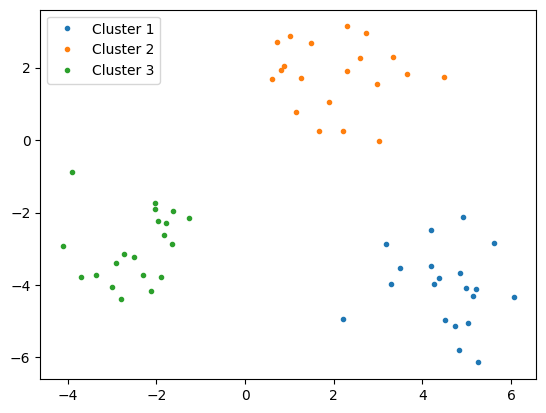

In [9]:
for i, set_list in enumerate(set_lists):
  plt.plot(datos_original[set_list, 0], datos_original[set_list, 1], '.', label="Cluster "+str(i+1))
plt.legend()
plt.show()

## Usando la librería scipy

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

In [10]:
# En cada ejecución de esta celda los datos se vuelven a concatenar de forma aleatoria
datos = np.concatenate((d1, d2, d3), axis=0)
datos = datos[np.random.permutation(len(datos))]
# En particular, hemos implementado el linkage centroid (se indica con el parámetro method)
# con la distancia euclidea (parámetro metric)
Z = linkage(datos, method='centroid', metric='euclidean')

Manualmente, dibujar el dendrograma resulta algo tedioso. Sin embargo, la librería scipy está preparada para dibujar directamente el dendrograma si lo necesitamos:

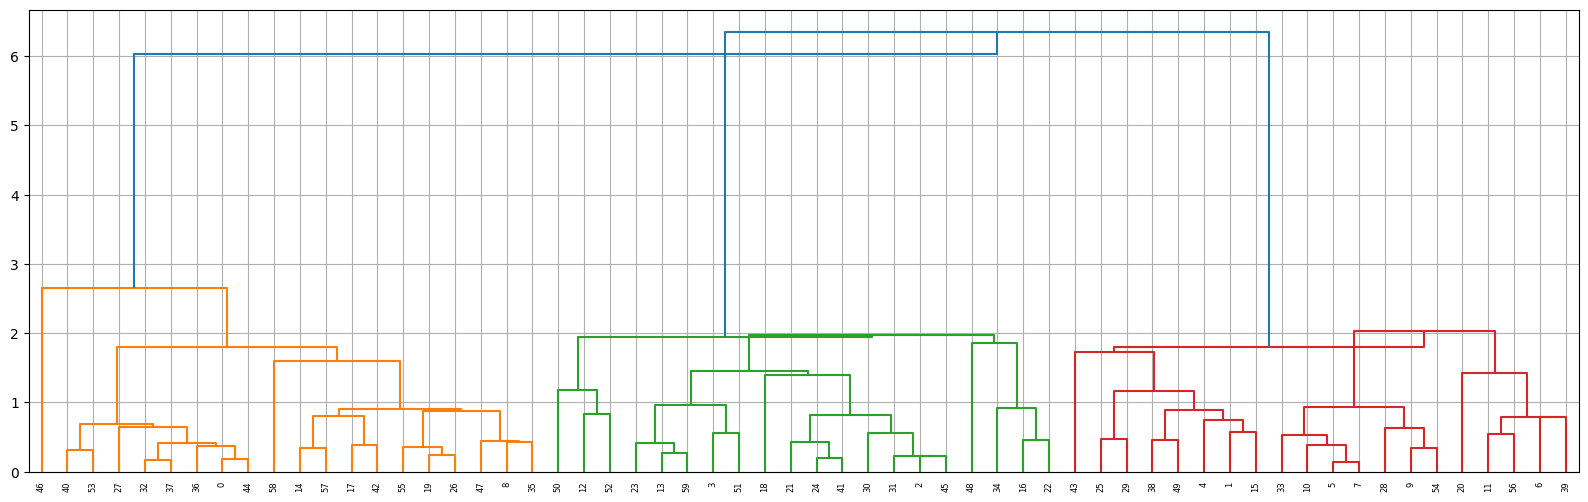

In [11]:
plt.figure(figsize=(20, 6))
dn = dendrogram(Z)
plt.grid()
plt.show()

Para poder separar los datos en los clusters que queremos, solamente necesitamos realizar el "corte" al dendrograma:

In [12]:
fcluster(Z, 3.74, criterion='distance')

array([1, 3, 2, 2, 3, 3, 3, 3, 1, 3, 3, 3, 2, 2, 1, 3, 2, 1, 2, 1, 3, 2,
       2, 2, 2, 3, 1, 1, 3, 3, 2, 2, 1, 3, 2, 1, 1, 1, 3, 3, 1, 2, 1, 3,
       1, 2, 1, 1, 2, 3, 2, 2, 2, 1, 3, 1, 3, 1, 1, 2], dtype=int32)

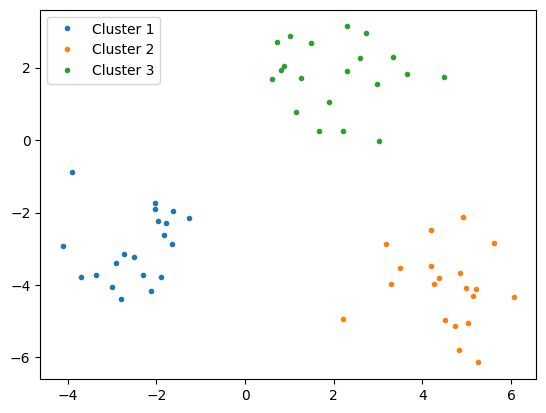

In [13]:
clusters = fcluster(Z, 5.08, criterion='distance')
for cluster in np.unique(clusters):
  plt.plot(datos[clusters == cluster, 0], datos[clusters == cluster, 1], '.', label="Cluster "+str(cluster))
plt.legend()
plt.show()

## Clustering Aglomerativo para los datos de MNIST

Vamos a descargar el dataset de MNIST para hacer clustering con los datos de MNIST:

In [14]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Dividimos entre 255 para que todos los atributos de la imagen estén entre 0 y 1.

In [15]:
x_train = x_train / 255
x_test = x_test / 255

Restamos ahora la media para destacar como positivos los píxeles de la clase y el resto con valores negativos.

In [16]:
x_train = x_train - (x_train.mean(axis=0))
x_test = x_test - (x_train.mean(axis=0))

Veamos el aspecto que tienen nuestros datos:

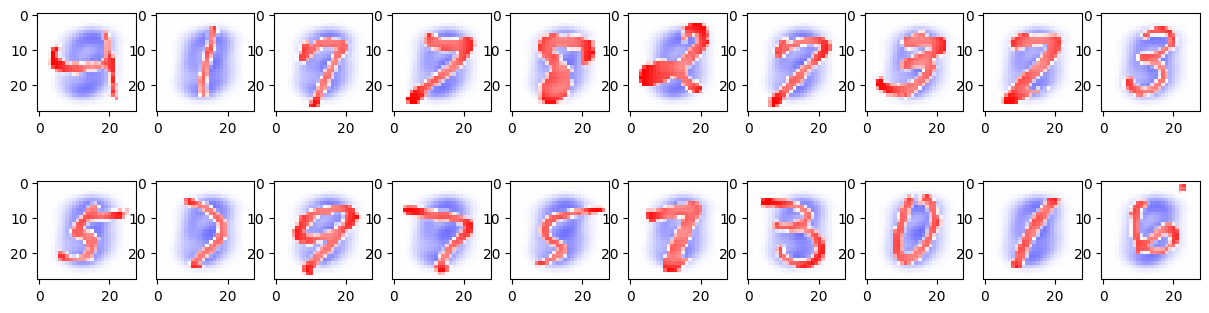

In [17]:
plt.figure(figsize=(15,4))
for i in range(20):
  plt.subplot(2,10,i+1)
  plt.imshow(x_train[np.random.randint(60000)], cmap="bwr", vmin=-1, vmax=1)
plt.show()

In [41]:
datos = x_train.reshape(x_train.shape[0], -1)
datos.shape

(60000, 784)

Para agilizar los cálculos (60000 imágenes tarda un buen rato) vamos a reducir el número de imágenes a 10000.

In [42]:
datos = datos[:10000]
datos.shape

(10000, 784)

In [43]:
Z = linkage(datos, method='single', metric='euclidean')

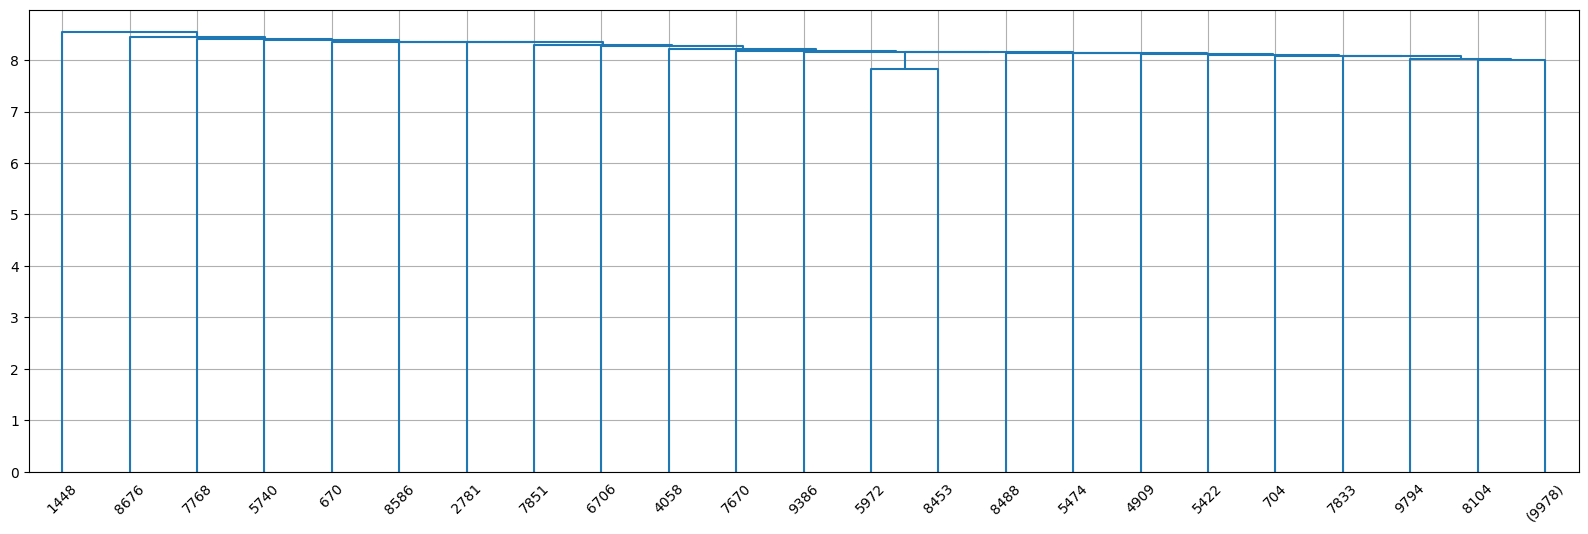

In [44]:
plt.figure(figsize=(20, 6))
dn = dendrogram(Z, truncate_mode="level", p=20)
plt.grid()
plt.show()

In [45]:
#clusters = fcluster(Z, 5.0, criterion='distance') # CENTROID
clusters = fcluster(Z, 5.0, criterion='distance') # SINGLE
len(np.unique(clusters))

4343

Cluster 1412


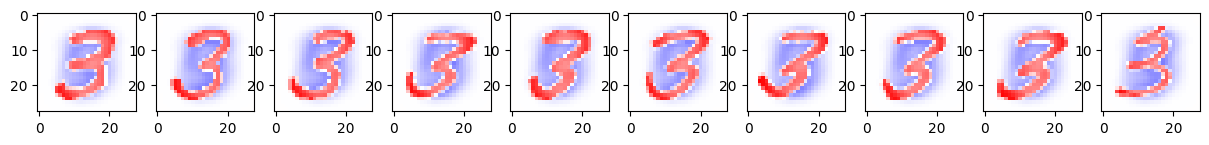

Cluster 1468


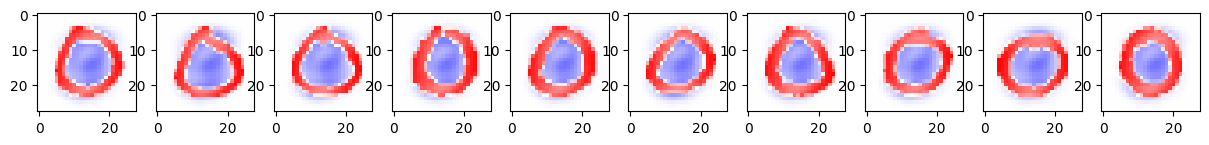

Cluster 1507


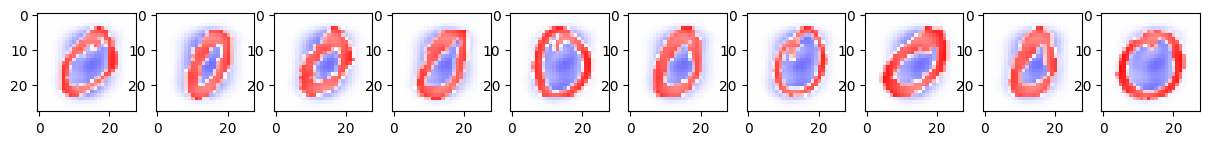

Cluster 1698


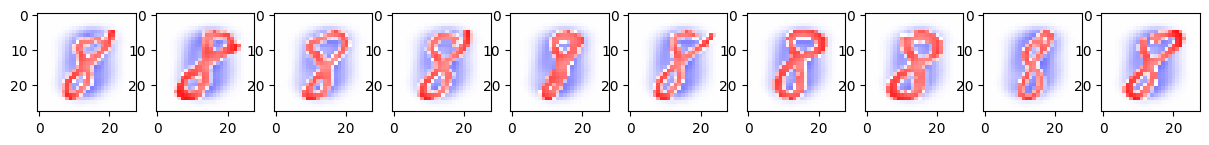

Cluster 1721


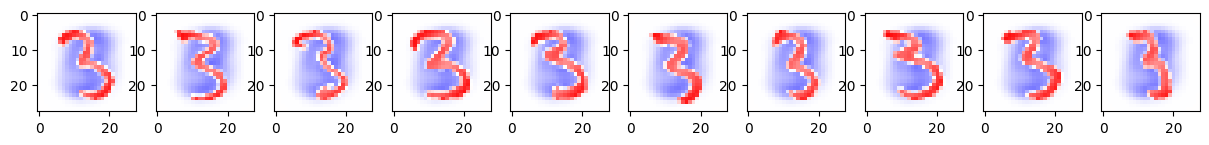

Cluster 1724


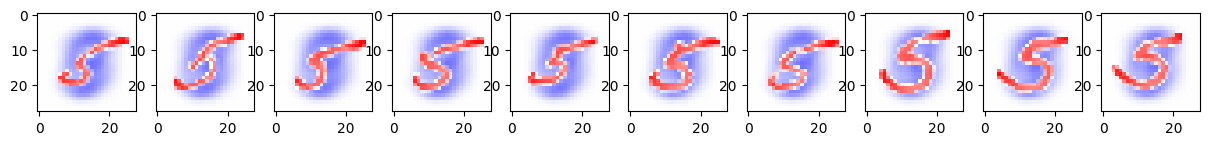

Cluster 1741


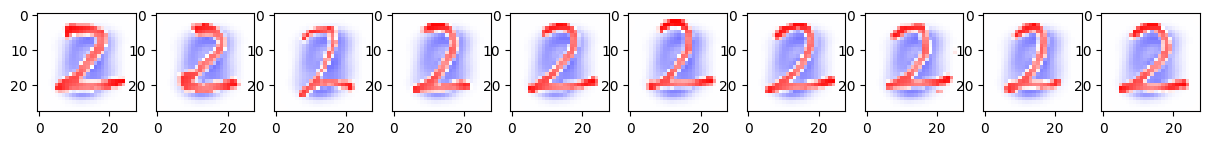

Cluster 1759


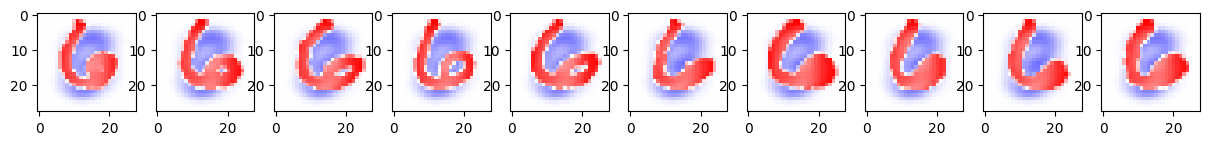

Cluster 1761


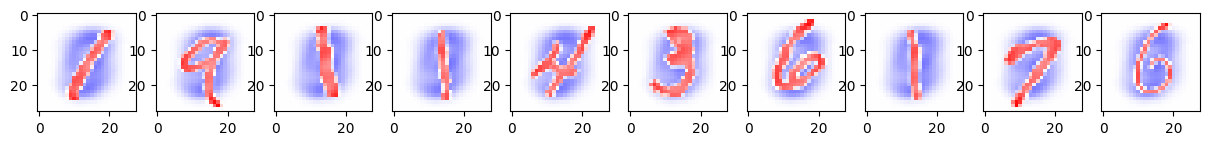

In [46]:
for c in np.unique(clusters):
  indices = np.where(clusters == c)[0]
  if len(indices) > 10:
    plt.figure(figsize=(15,4))
    #plt.title("Cluster " + str(c))
    print("Cluster", c)
    for i in range(10):
      plt.subplot(1,10,i+1)
      plt.imshow(x_train[indices][i], cmap="bwr", vmin=-1, vmax=1)
    plt.show()